# Clasificación del IRIS dataset con KNN. 
Vamos a entrenar dos algoritmos de clasificación usando el IRIS Dataset. La idea es que después de terminar el ejercicio comparen la performance de los árboles de decisión y KNN, y determinen cuál es, a su criterio, el que mejor funciona para clasificar estos datos. 
**Recuerden que las conclusiones que saquemos de este procedimiento son propias del problema.** ¡Manos a la obra! 


## A. Cargar el dataset
1. Importar pandas y seaborn. 
2. Cargar el iris dataset. 
3. Separar el dataset en datos (X) y etiquetas (y).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset('iris')
X = iris.drop("species", axis=1)
y = iris.species

4. Separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test,y_test) usando la función **train_test_split** de scikit-learn [recordar importarla primero!]

In [2]:
from sklearn.model_selection import train_test_split
X_dev, X_held, y_dev, y_held = train_test_split(X, y, test_size=0.3, random_state=0)

## B. Preprocessing. 
Como vimos las veces que utilizamos este dataset, las distintas variables no están normalizadas. Para que KNN funcione bien, es conveniente que lo estén (¿Por qué?). Entonces, vamos a utilizar el StandardScaler para que estas variables sean comparables. 

0. Chequeá cuál es el mean y el std de X_train y X_test. 
1. Importá el StandardScaler. 
2. Cargar el StandardScaler.
3. Fittearlo con los datos de entrenamiento X_train (¿Por qué no con y_train?¿Por qué no con X_test? Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
4. Transformá las variables X_train e X_test con el StandatdScaler que entrenaste (¿Por qué no y_train e y_test?Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
5. Chequeá cuál es el mean y el std de las X_train y X_test transformadas. 


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_dev);

In [4]:
X_dev_scal = scaler.transform(X_dev)  
X_held_scal = scaler.transform(X_held)  

In [5]:
X_dev.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

## C. KNN 
1. Importá el modelo de KNN de sklearn usando la siguiente linea: *from sklearn.neighbors import KNeighborsClassifier* 
2. Cuando cargamos el algoritmo, tenemos que indicarle los hiperparámetros que queremos utilizar. La distancia, por default, es la euclideana. Cargá el modelo utilizando 5 vecinos. 


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors =n_neighbors )

3. Fiteá el modelo utilizando los datos de entrenamiento escaleados. 
4. Calculá el Accuracy DE ENTRENAMIENTO [importar funciones necesarias]
5. Calculá el Accuracy DE TEST.
6. ¿Conclusiones?

In [8]:
clf.fit(X_dev_scal,y_dev)
from sklearn.metrics import accuracy_score

y_dev_pred = clf.predict(X_dev_scal)
train_acc = accuracy_score(y_dev, y_dev_pred)
print(train_acc)

0.9714285714285714


In [9]:
y_held_pred = clf.predict(X_held_scal)
test_acc = accuracy_score(y_held, y_held_pred)                                                       
print(test_acc)

0.9777777777777777


3.Para poder determinar el hiperparámetro K, es útil trazar la curva de complejidad. Corré las lineas a continuación e interpretá la curva. 

In [10]:
import matplotlib.pyplot as plt
####
#### PONERLE ESTOS NOMBRE A LAS VARIABLES
# clf = modelo fiteado
# X_train_scal, X_test_scal = datos escaleados


####
ACC_dev = []
ACC_held = []
vecinos = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_dev_scal,y_dev)
    y_dev_pred = clf.predict(X_dev_scal)
    dev_acc = accuracy_score(y_dev, y_dev_pred)
    ACC_dev.append(dev_acc)
    y_held_pred = clf.predict(X_held_scal)
    held_acc = accuracy_score(y_held, y_held_pred)
    ACC_held.append(held_acc)

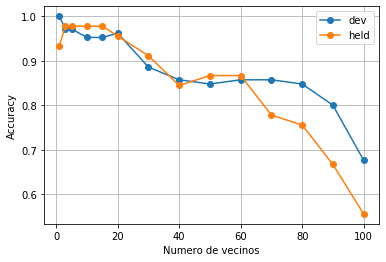

In [11]:
plt.plot(vecinos,ACC_dev,'o-',label='dev' )
plt.plot(vecinos,ACC_held,'o-',label='held')
plt.xlabel('Numero de vecinos')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

Elegí un intervalo donde te parece que es razonable buscar el K y volvé a graficar. ¿Cuál K usarías? [NOTA BIEN EN QUÉ ESCALA ESTA EL EJE "Y"]

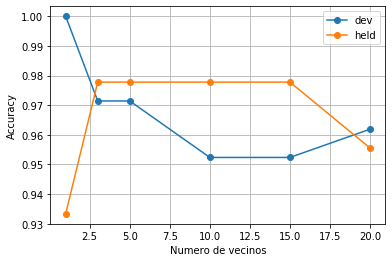

In [12]:
#x = ???
x=6
plt.plot(vecinos[:x],ACC_dev[:x],'o-',label='dev' )
plt.plot(vecinos[:x],ACC_held[:x],'o-',label='held')
plt.xlabel('Numero de vecinos')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

## Cross-validation

Ahora trabajemos los nuevos conceptos sobre lo aprendido. Para eso, vamos a implementar K-fold cross validation para el caso de KNN aplicado al Dataset de IRIS.

Les recomendamos seguir las instrucciones al pie de la letra antes de desesperar. 

Antes de empezar, corré hasta aca el notebook.

In [13]:
from sklearn.model_selection import KFold
import numpy as np

In [14]:
# Seteamos los folds en los que queremos entrenar y testear.
# Se te ocurre algún caso donde shuffle debe ser False? (si no se te ocurre, dejá para el final esta pregunta)
kf = KFold(n_splits=10,shuffle=True) 

##### Remember: each fold corresponds to one of the classes in the iris dataset, and so nothing can be learned. Another way to resolve this problem is to shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label. We can do that by setting the shuffle parameter of KFold to True . If we shuffle the data, we also need to fix the random_state to get a reproducible shuffling. Otherwise, each run of cross_val_score would yield a different result, as each time a different split would be used (this might not be a problem, but can be surprising). Shuffling the data before splitting it yields a much better result:

In [15]:
pd.DataFrame(X_dev).head()

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [16]:
#Completá la funcion para que esto funcione
# PASO 1) Llamá 'X' a la variable que creés que hay que separar en distintos folds
# PASO 2) Ejecutá  esta celda. Investigá qué pasa. 

#X = iris.drop("species", axis=1)
#y = iris.species

X = pd.DataFrame(X_dev_scal)
y = pd.DataFrame(y_dev)



for train_index, test_index in kf.split(X):
    print(" \n \n \n \n TRAIN:", train_index, " \n \n TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

 
 
 
 
 TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  22  23  25  26  27  28  29  30  31  32  33  34  35  37  38  39
  40  41  42  43  44  45  46  49  50  51  54  55  56  57  58  59  60  61
  62  63  64  65  67  68  69  70  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  91  92  93  94  95  96  97  98  99 100
 101 102 103 104]  
 
 TEST: [16 21 24 36 47 48 52 53 66 71 90]
 
 
 
 
 TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  15  16  17  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  87  88  89  90  92  94  96  97  98 100
 101 102 103 104]  
 
 TEST: [ 0 12 13 14 18 61 86 91 93 95 99]
 
 
 
 
 TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24 

/home/tele/anaconda3/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


Ahora que sabemos como funciona el k-fold podemos utilizarlo para evaluar la performance del modelo

In [17]:
# Completá con las siguientes instrucciones:

# 1- Separar en conjunto train y test, usando como ejemplo la celda de arriba
# 2- Entrenar el StdScaler con los datos de entrenamiento
# 3- Re-escalar tus datos (y no etiquetas) de entrenamiento y test 
# 4- Llamar al algoritmo de KNN de sklearn. Elegir el número de vecinos que creas conveniente, según analizaste clases anteriores
# 5- Fiteá el modelo con los datos de entrenamiento. 
# 6- Realizá predicciones para los conjuntos de entrenamiento y test (ojo la escala!)
# 5- Calculá el accuracy_score del conjunto de entrenamiento y guardala en la variable 'train_acc'
# 6- Calculá el accuracy_score del conjunto de test y guardala en la variable 'test_acc'


X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

X=X.reset_index()
y=y.reset_index()

print(y.head())
print(X.head())


TEST_ACC,TRAIN_ACC=[],[]
for train_index, test_index in kf.split(X):
   
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_scal =scaler.transform(X_train)
    X_test_scal = scaler.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train_scal,y_train.species)
    
    y_train_pred = clf.predict(X_train_scal)

    train_acc = accuracy_score(y_train.species, y_train_pred)
    
    y_test_pred = clf.predict(X_test_scal)
    test_acc = accuracy_score(y_test.species, y_test_pred)
    
    
    TEST_ACC.append(test_acc)
    TRAIN_ACC.append(train_acc)
    
    

   index     species
0     60  versicolor
1    116   virginica
2    144   virginica
3    119   virginica
4    108   virginica
   index  sepal_length  sepal_width  petal_length  petal_width
0     60           5.0          2.0           3.5          1.0
1    116           6.5          3.0           5.5          1.8
2    144           6.7          3.3           5.7          2.5
3    119           6.0          2.2           5.0          1.5
4    108           6.7          2.5           5.8          1.8


In [18]:
TRAIN_ACC

[0.9893617021276596,
 0.9893617021276596,
 1.0,
 0.9893617021276596,
 0.9893617021276596,
 0.9894736842105263,
 0.9894736842105263,
 0.9894736842105263,
 0.9894736842105263,
 0.9894736842105263]

#### Boxplot del Accuracy de los conjuntos de entrenamiento y validación. 

Qué valor de accuracy reportarías?
Qué nos dice la varianza en cada caso?

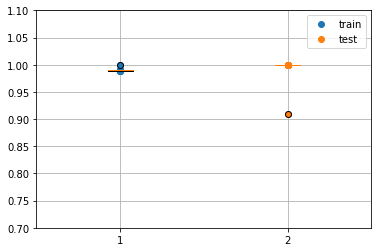

In [19]:
## Boxplot del Accuracy de los conjuntos de entrenamiento y validación. 

## Qué valor de accuracy reportarías?
## Qué nos dice la varianza en cada caso?

plt.plot([1]*len(TRAIN_ACC),TRAIN_ACC,'o',label='train')
plt.plot([2]*len(TEST_ACC),TEST_ACC,'o',label='test')
plt.ylim(0.7,1.1)
plt.boxplot([TRAIN_ACC,TEST_ACC]);
plt.grid()
plt.legend()

#### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
Vamos a reportar el  valor medio del accuracy y su varianza. 

No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 


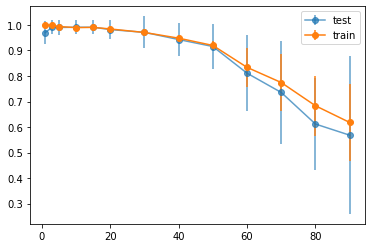

In [20]:
### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
### Vamos a reportar el  valor medio del accuracy y su varianza. 
### No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 

vecinos = [1,3,5,10,15,20,30,40,50,60,70,80,90]

X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

X=X.reset_index()
y=y.reset_index()


TEST_ACC,TRAIN_ACC=[],[]
TEST_ACC_var,TRAIN_ACC_var=[],[]

for n in vecinos:
    aux_TEST_ACC,aux_TRAIN_ACC=[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        scaler = StandardScaler()
        scaler.fit(X_train);
        X_train_scal = scaler.transform(X_train)  
        X_test_scal = scaler.transform(X_test)  
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_scal,y_train.species)
        y_train_pred = clf.predict(X_train_scal)
        train_acc = accuracy_score(y_train.species, y_train_pred)
        y_test_pred = clf.predict(X_test_scal)
        test_acc = accuracy_score(y_test.species, y_test_pred)
        aux_TEST_ACC.append(test_acc)
        aux_TRAIN_ACC.append(train_acc)
    
    TEST_ACC.append(np.mean(aux_TEST_ACC))
    TRAIN_ACC.append(np.mean(aux_TRAIN_ACC))
    TEST_ACC_var.append(np.std(aux_TEST_ACC))
    TRAIN_ACC_var.append(np.std(aux_TRAIN_ACC))

plt.errorbar(x=vecinos,y=TEST_ACC,yerr=TEST_ACC_var,fmt='o-',label='test',alpha=0.7)

plt.errorbar(x=vecinos,y=TRAIN_ACC,yerr=TRAIN_ACC_var,fmt='o-',label='train',alpha=1)
plt.legend()
plt.show()

#### Para n_neighbors=5, cros-validation usando `cross_val_score` y `kfold`

In [21]:
# Otra forma más simple pero con menos control
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_dev_scal,y_dev)
y_dev_pred = clf.predict(X_dev_scal)
    
scores = cross_val_score(clf,X_dev_scal, y_dev,cv= 10, scoring='accuracy')
scores

array([0.91666667, 0.83333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9       , 1.        , 1.        ])

In [22]:
X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

X=X.reset_index()
y=y.reset_index()

kf = KFold(n_splits=10,shuffle=True,random_state=0) 

TEST_ACC,TRAIN_ACC=[],[]
for train_index, test_index in kf.split(X):
   
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_scal =scaler.transform(X_train)
    X_test_scal = scaler.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_scal,y_train.species)
    
    y_train_pred = clf.predict(X_train_scal)

    train_acc = accuracy_score(y_train.species, y_train_pred)
    
    y_test_pred = clf.predict(X_test_scal)
    test_acc = accuracy_score(y_test.species, y_test_pred)
    
    
    TEST_ACC.append(test_acc)
    TRAIN_ACC.append(train_acc)
    
print(TEST_ACC)   

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0]


DESAFÍO 1: ¿Qué paso de la cros-validación creen que no está implementado en el orden adecuado? ¿Cómo lo resolverías?

NO es correcto hacer el rescalado en cada paso de la cros-validación porque no estamos seguros de que se mantenga la forma de la distribución. Lo correcto seria aplicar una normalizacion hecha con todo el dev set y en todo caso ver el impacto de esa normalización aplicando la cros-validación a los datos sin y con normalización

DESAFÍO 2: Trazar la curva de complejidad usando cross-validation para árboles de decisión.


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
n_neighbors = 5
clf = DecisionTreeClassifier(max_depth = 2)

clf.fit(X_dev_scal,y_dev)

y_dev_pred = clf.predict(X_dev_scal)
train_acc = accuracy_score(y_dev, y_dev_pred)
print(train_acc)
y_held_pred = clf.predict(X_held_scal)
test_acc = accuracy_score(y_held, y_held_pred)                                                       
print(test_acc)

0.9619047619047619
0.9111111111111111


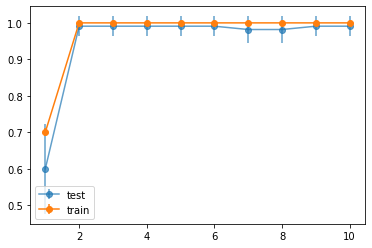

In [25]:
### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
### Vamos a reportar el  valor medio del accuracy y su varianza. 
### No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 

profundidad = [1,2,3,4,5,6,7,8,9,10]

X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

X=X.reset_index()
y=y.reset_index()


TEST_ACC,TRAIN_ACC=[],[]
TEST_ACC_var,TRAIN_ACC_var=[],[]

for n in profundidad:
    aux_TEST_ACC,aux_TRAIN_ACC=[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        scaler = StandardScaler()
        scaler.fit(X_train);
        X_train_scal = scaler.transform(X_train)  
        X_test_scal = scaler.transform(X_test)  
        clf = DecisionTreeClassifier(max_depth = n)
        clf.fit(X_train_scal,y_train.species)
        y_train_pred = clf.predict(X_train_scal)
        train_acc = accuracy_score(y_train.species, y_train_pred)
        y_test_pred = clf.predict(X_test_scal)
        test_acc = accuracy_score(y_test.species, y_test_pred)
        aux_TEST_ACC.append(test_acc)
        aux_TRAIN_ACC.append(train_acc)
    
    TEST_ACC.append(np.mean(aux_TEST_ACC))
    TRAIN_ACC.append(np.mean(aux_TRAIN_ACC))
    TEST_ACC_var.append(np.std(aux_TEST_ACC))
    TRAIN_ACC_var.append(np.std(aux_TRAIN_ACC))

plt.errorbar(x=profundidad,y=TEST_ACC,yerr=TEST_ACC_var,fmt='o-',label='test',alpha=0.7)

plt.errorbar(x=profundidad,y=TRAIN_ACC,yerr=TRAIN_ACC_var,fmt='o-',label='train',alpha=1)
plt.legend()
plt.show()

### Ejercicio: 

Investigar qué características tienen
* Leave-one-out cross validation 
* Suffle-split cross validation